<a href="https://colab.research.google.com/github/jwshin0908/Algorithm/blob/main/KOREANRE_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.3 MB/s eta 0:00:00


In [2]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=1b167fdca3107a9b606ce9df5c2081e973dd69b766da233b0d5e805c49b820b6
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 0. 라이브러리 설정

In [104]:
import ta
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statsmodels
import warnings
import yfinance as yf
from mplfinance.original_flavor import candlestick2_ohlc

warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.options.display.float_format="{:.5f}".format
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

### 1. 데이터 전처리

#### 1.1. 기본 데이터(코리안리 (003690) | KOSPI)

+ 추후 각종 주가지표 계산을 위해 2000년 1월 1일 ~ 25년 1월 22일까지의 데이터 다운로드
+ 데이터 전처리를 거쳐 모델링에 사용 예정

In [114]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/코리안리/코리안리(000101_191231).csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/코리안리/코리안리(200101_250123).csv')

In [115]:
# 데이터프레임 리스트
dfs = [df2, df1]

# 아래로 이어붙이기
df = pd.concat(dfs, axis=0, ignore_index=True)

In [116]:
df.shape

(6290, 9)

In [117]:
df.head()

,날짜,종가,시가,고가,저가,거래량,등락률,거래량.1,등락률.1
0,2025-01-22,8000,8100,8160,7970,255.80K,-1.23%,255800,-1.23000
1,2025-01-21,8100,8210,8210,8080,176.81K,-0.61%,176810,-0.61000
2,2025-01-20,8150,8300,8300,8100,124.09K,-1.21%,124090,-1.21000
3,2025-01-17,8250,8110,8250,8100,131.72K,1.73%,131720,1.73000
4,2025-01-16,8110,8400,8400,8100,193.99K,-2.76%,193990,-2.76000


In [118]:
df = df.sort_index(ascending=False).reset_index(drop=True)

In [119]:
df.columns

Index(['날짜', '종가', '시가', '고가', '저가', '거래량', '등락률', '거래량.1', '등락률.1'], dtype='object')

In [120]:
df = df.drop(columns=['거래량', '등락률'])

In [121]:
df = df.rename(columns={
    '날짜': '일자',
    '거래량.1': '거래량',
    '등락률.1': '등락률'
})

In [122]:
df

,일자,종가,시가,고가,저가,거래량,등락률
0,2000-01-04,764,671,764,671,1790000,14.71000
1,2000-01-05,740,714,777,714,1790000,-3.14000
2,2000-01-06,716,782,782,714,1330000,-3.24000
3,2000-01-07,735,740,751,716,2790000,2.65000
4,2000-01-10,843,843,843,777,1200000,14.69000
...,...,...,...,...,...,...,...
6285,2025-01-16,8110,8400,8400,8100,193990,-2.76000
6286,2025-01-17,8250,8110,8250,8100,131720,1.73000
6287,2025-01-20,8150,8300,8300,8100,124090,-1.21000
6288,2025-01-21,8100,8210,8210,8080,176810,-0.61000


In [123]:
#df.to_csv('/content/drive/MyDrive/Colab Notebooks/코리안리/코리안리(000101_250123).csv', encoding='cp949', index=False)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      6290 non-null   object 
 1   종가      6290 non-null   int64  
 2   시가      6290 non-null   int64  
 3   고가      6290 non-null   int64  
 4   저가      6290 non-null   int64  
 5   거래량     6290 non-null   int64  
 6   등락률     6290 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 344.1+ KB


In [125]:
# 데이터 전처리 이전, 파생변수 생성을 위한 간단한 작업
df.rename(columns={'등락률':'수익률'}, inplace = True)
df['수익률'] = df['수익률']/100
df['날짜'] = pd.to_datetime(df['날짜'], format = '%Y-%m-%d')
df = df.sort_values(by = '날짜',ascending = True)
df.reset_index(drop=True, inplace=True)

KeyError: '날짜'

In [126]:
df

,일자,종가,시가,고가,저가,거래량,수익률
0,2000-01-04,764,671,764,671,1790000,0.14710
1,2000-01-05,740,714,777,714,1790000,-0.03140
2,2000-01-06,716,782,782,714,1330000,-0.03240
3,2000-01-07,735,740,751,716,2790000,0.02650
4,2000-01-10,843,843,843,777,1200000,0.14690
...,...,...,...,...,...,...,...
6285,2025-01-16,8110,8400,8400,8100,193990,-0.02760
6286,2025-01-17,8250,8110,8250,8100,131720,0.01730
6287,2025-01-20,8150,8300,8300,8100,124090,-0.01210
6288,2025-01-21,8100,8210,8210,8080,176810,-0.00610


#### 1.2. 파생변수 생성(주가 보조 지표)
+ 기술적 분석 지표들 생성
+ 추후 전처리 과정을 통해 data reducing 작업을 수행할 예정

In [127]:
H, L, C, V = df['고가'], df['저가'], df['종가'], df['거래량']

#### 1.3. Momentum Indicators 생성

In [128]:
# Relative Strength Index (RSI)
df['RSI'] = ta.momentum.rsi(close=C, fillna=True)
# Ultimate Oscillator (UO)
df['UO'] = ta.momentum.ultimate_oscillator(high=H, low=L, close=C, fillna=True)
# Stochastic Oscillator (SR)
df['SR'] = ta.momentum.stoch(close=C, high=H, low=L, fillna=True)
# Williams %R (WR)
df['WR'] = ta.momentum.williams_r(high=H, low=L, close=C, fillna=True)
# Rate of Change (ROC)
df['ROC'] = ta.momentum.roc(close=C, fillna=True)

#### 1.4. Volume Indicator 생성

In [129]:
# On-Balance Volume (OBV)
df['OBV'] = ta.volume.on_balance_volume(close=C, volume=V, fillna=True)

#### 1.5. Volatility Indicators 생성

In [130]:
# Bollinger High Bands (BHB)
df['BHB'] = ta.volatility.bollinger_hband(close=C, fillna=True)
# Bollinger Low Bands (BLB)
df['BLB'] = ta.volatility.bollinger_lband(close=C, fillna=True)

#### 1.6. Trend Indicators 생성

In [131]:
# Exponential Moving Average (EMA)
df['EMA'] = ta.trend.ema_indicator(close=C, fillna=True)
# Weighted Moving Average (WMA)
df['WMA'] = ta.trend.wma_indicator(close=C, fillna=True)
# Moving Average Convergence Divergence (MACD)
df['MACD'] = ta.trend.macd(close=C, fillna=True)
# Average Directional Movement Index (ADX)
df['ADX'] = ta.trend.adx(high=H, low=L, close=C, fillna=True)
# Commodity Channel Index (CCI)
df['CCI'] = ta.trend.cci(high=H, low=L, close=C, fillna=True)

#### 1.7. 생성 완료된 raw 데이터

In [132]:
df.head()

,일자,종가,시가,고가,저가,거래량,수익률,RSI,UO,SR,WR,ROC,OBV,BHB,BLB,EMA,WMA,MACD,ADX,CCI
0,2000-01-04,764,671,764,671,1790000,0.14710,100.00000,0.00000,100.00000,-0.00000,0.00000,1790000,764.00000,764.00000,764.00000,0.00000,0.00000,0.00000,0.00000
1,2000-01-05,740,714,777,714,1790000,-0.03140,0.00000,16.66667,65.09434,-34.90566,0.00000,0,776.00000,728.00000,760.30769,0.00000,-1.91453,0.00000,66.66667
2,2000-01-06,716,782,782,714,1330000,-0.03240,0.00000,12.50000,40.54054,-59.45946,0.00000,-1330000,779.19184,700.80816,753.49112,0.00000,-5.30723,0.00000,-11.76471
3,2000-01-07,735,740,751,716,2790000,0.02650,30.65525,18.14672,57.65766,-42.34234,0.00000,1460000,772.96622,704.53378,750.64634,0.00000,-6.38918,0.00000,-57.14286
4,2000-01-10,843,843,843,777,1200000,0.14690,75.89307,42.23433,100.00000,-0.00000,0.00000,2660000,848.43783,670.76217,764.85459,0.00000,1.45134,0.00000,166.66667


#### 1.8 거래량 0인 row 제거

In [133]:
df.shape

(6290, 20)

In [134]:
df = df[df['거래량'] != 0]

In [135]:
df.shape

(6188, 20)

### 2. 데이터 EDA

#### 2.1. 결측치 파악

In [136]:
df.isnull().sum()

,0
일자,0
종가,0
시가,0
고가,0
저가,0
거래량,0
수익률,0
RSI,0
UO,0
SR,0


#### 2.2. 전반적인 데이터 수치 분포 파악

In [137]:
df.describe()

,종가,시가,고가,저가,거래량,수익률,RSI,UO,SR,WR,ROC,OBV,BHB,BLB,EMA,WMA,MACD,ADX,CCI
count,6188.00000,6188.00000,6188.00000,6188.00000,6188.00000,6188.00000,6188.00000,6188.00000,6188.00000,6188.00000,6188.00000,6188.00000,6188.00000,6188.00000,6188.00000,6188.00000,6188.00000,6188.00000,6188.00000
mean,5998.58888,5997.43164,6083.96655,5905.03394,773440.46703,-0.00403,50.22247,51.61779,43.58948,-56.41052,0.30731,601450109.87395,6665.75962,5397.81060,6031.81844,6032.09229,4.49847,17.96897,-3.35471
std,2590.70418,2592.17841,2625.64908,2554.50412,890924.11888,0.04995,9.61723,10.19167,30.81933,30.81933,9.14911,170000448.45554,2922.24043,2399.82788,2600.57654,2605.25929,124.87528,9.06527,101.49590
min,326.00000,326.00000,354.00000,317.00000,10.00000,-0.41990,0.00000,0.00000,0.00000,-100.00000,-45.55118,-2961450.00000,391.00843,296.87983,370.76161,0.00000,-568.80228,0.00000,-411.83504
25%,5028.00000,5028.00000,5090.00000,4965.00000,300397.50000,-0.01230,45.32455,45.58223,14.31804,-85.68196,-3.74153,574188690.00000,5484.13491,4084.18943,5108.21897,5068.16111,-65.91636,11.10708,-69.64203
50%,6722.00000,6721.00000,6800.50000,6632.00000,502165.00000,0.00000,49.30597,51.61387,40.89572,-59.10428,0.00000,672924950.00000,7452.77444,5993.49790,6794.84275,6785.56667,1.51517,16.78618,-15.75435
75%,7830.00000,7830.00000,7917.00000,7722.00000,896432.50000,0.01130,54.72907,58.11894,70.94077,-29.05923,4.21592,714328177.50000,8562.54235,7197.99674,7846.11709,7839.51667,71.49931,22.82959,65.07230
max,14500.00000,14500.00000,14500.00000,14500.00000,15450000.00000,0.44010,100.00000,88.24364,100.00000,-0.00000,83.96346,734455480.00000,13220.18875,9778.66456,10318.79522,10666.40000,722.65329,64.27550,666.66667


#### [수익률] EDA

In [ ]:
plt.figure(figsize=(20,8))

# 수익률 lineplot
plt.subplot(2,2,3)
sns.lineplot(data=df, x='일자',y='수익률')

# 수익률 boxplot
plt.subplot(2,2,4)
sns.boxplot(df['수익률'])

<Axes: ylabel='수익률'>

#### [시가, 고가, 저가, 종가, bollinger band] + 5,20,60,120일 이동평균 EDA

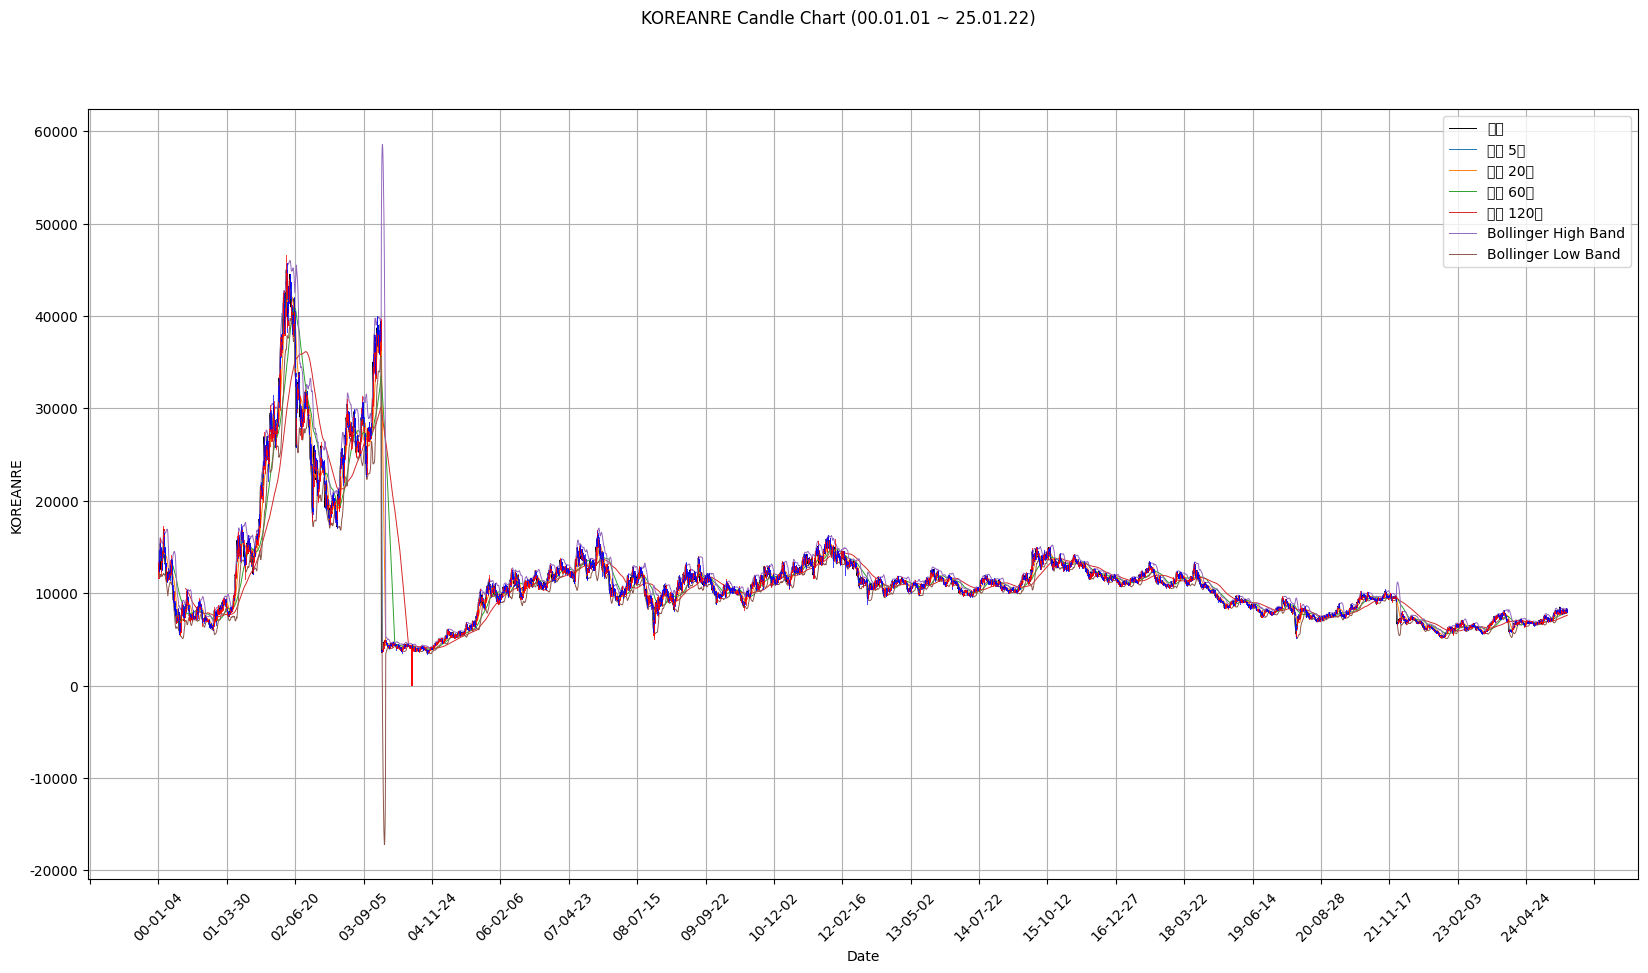

In [23]:
# 전체 데이터 시각화

fig, ax = plt.subplots(figsize=(20,10))

# x축 날짜
xdate = df['일자'].astype('str')
for i in range(len(xdate)):
    xdate[i] = xdate[i][2:] # 2020-01-01 => 20-01-01

# 종가 및 5,20,60,120일 이동평균
ax.plot(xdate, df['종가'], label="종가",linewidth=0.7,color='k')
ax.plot(xdate, df['종가'].rolling(window=5).mean(), label="평균 5일",linewidth=0.7)
ax.plot(xdate, df['종가'].rolling(window=20).mean(), label="평균 20일",linewidth=0.7)
ax.plot(xdate, df['종가'].rolling(window=60).mean(), label="평균 60일",linewidth=0.7)
ax.plot(xdate, df['종가'].rolling(window=120).mean(), label="평균 120일",linewidth=0.7)
ax.plot(xdate, df['BHB'], label="Bollinger High Band",linewidth=0.7)
ax.plot(xdate, df['BLB'], label="Bollinger Low Band",linewidth=0.7)
candlestick2_ohlc(ax,df['시가'],df['고가'],df['저가'],df['종가'], width=0.5, colorup='r', colordown='b')

fig.suptitle("KOREANRE Candle Chart (00.01.01 ~ 25.01.22)")
ax.set_xlabel("Date")
ax.set_ylabel("KOREANRE")
ax.xaxis.set_major_locator(ticker.MaxNLocator(25)) # x-축에 보일 ticker 개수 ~20개이면 1달
ax.legend(loc=1) # legend 위치
plt.xticks(rotation = 45) # x-축 글씨 45도 회전

plt.grid() # 그리드 표시
plt.show()

In [24]:
kr = yf.download('003690.KS', start="2000-01-01", end="2025-01-22")
kr.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,003690.KS,003690.KS,003690.KS,003690.KS,003690.KS
Date,,,,,
2005-09-29,2840.89551,2950.82843,2826.43077,2950.82843,1587772
2005-09-30,2774.35767,2887.18350,2664.42473,2878.50455,1937427
2005-10-03,2774.35767,2774.35767,2774.35767,2774.35767,0
2005-10-04,2739.64136,2768.57110,2690.46108,2690.46108,1462633
2005-10-05,2661.53174,2756.99967,2644.17384,2699.14017,1768945
